In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  

from sklearn.preprocessing import StandardScaler, OneHotEncoder, QuantileTransformer, PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 50
pd.options.display.max_columns = 200

In [3]:
df_btc= web.DataReader('BTC-USD', data_source='yahoo', start='2017-01-01', end=dt.datetime.now())
df_btc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,1.477750e+08,998.325012
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,2.221850e+08,1021.750000
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,1.851680e+08,1043.839966
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,3.449460e+08,1154.729980
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,5.101990e+08,1013.380005
...,...,...,...,...,...,...
2021-12-04,53904.679688,42874.617188,53727.878906,49200.703125,6.138568e+10,49200.703125
2021-12-05,49768.148438,47857.496094,49201.519531,49368.847656,3.719820e+10,49368.847656
2021-12-06,50929.519531,47281.035156,49413.480469,50582.625000,3.770731e+10,50582.625000


In [4]:
df_btc = df_btc.rename({'High': 'btc_high', 'Low': 'btc_low','Open': 'btc_open', 'Close': 'btc_close','Volume':'btc_volume','Adj Close':'btc_adj_close'}, axis=1)
df_btc.columns

Index(['btc_high', 'btc_low', 'btc_open', 'btc_close', 'btc_volume',
       'btc_adj_close'],
      dtype='object')

In [5]:
df_eth= web.DataReader('ETH-USD', data_source='yahoo', start='2017-01-01', end=dt.datetime.now())
df_eth


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,8.471230,7.982310,7.982310,8.172570,1.473170e+07,8.172570
2017-01-02,8.436330,8.054410,8.170870,8.378510,1.457960e+07,8.378510
2017-01-03,9.996800,8.317170,8.374580,9.725250,3.362520e+07,9.725250
2017-01-04,11.276400,9.559810,9.709290,11.251600,4.105120e+07,11.251600
2017-01-05,11.890900,9.402680,11.286800,10.254400,4.155740e+07,10.254400
...,...,...,...,...,...,...
2021-12-04,4242.725586,3525.494141,4227.762207,4119.587402,3.847900e+10,4119.587402
2021-12-05,4246.923340,4040.217529,4119.628906,4198.322754,2.553306e+10,4198.322754
2021-12-06,4375.520508,3930.806641,4199.000000,4358.737305,2.822952e+10,4358.737305


In [6]:
df_eth = df_eth.rename({'High': 'eth_high', 'Low': 'eth_low','Open': 'eth_open', 'Close': 'eth_close','Volume':'eth_volume','Adj Close':'eth_adj_close'}, axis=1)
df_eth.columns

Index(['eth_high', 'eth_low', 'eth_open', 'eth_close', 'eth_volume',
       'eth_adj_close'],
      dtype='object')

In [7]:
df_ltc= web.DataReader('LTC-USD', data_source='yahoo', start='2017-01-01', end=dt.datetime.now())
df_ltc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,4.521530,4.328710,4.329120,4.511590,1.133750e+07,4.511590
2017-01-02,4.737660,4.484660,4.520450,4.648940,1.459530e+07,4.648940
2017-01-03,4.731840,4.564870,4.655880,4.626200,1.005570e+07,4.626200
2017-01-04,4.837850,4.633750,4.633750,4.837850,1.376240e+07,4.837850
2017-01-05,4.945860,4.226870,4.914370,4.292720,1.919600e+07,4.292720
...,...,...,...,...,...,...
2021-12-04,189.431015,132.054291,188.348557,163.052704,3.667491e+09,163.052704
2021-12-05,165.017883,149.273392,162.957245,156.409790,1.952282e+09,156.409790
2021-12-06,164.308563,141.773041,156.511353,161.886520,1.959779e+09,161.886520


In [8]:
df_ltc = df_ltc.rename({'High': 'ltc_high', 'Low': 'ltc_low','Open': 'ltc_open', 'Close': 'ltc_close','Volume':'ltc_volume','Adj Close':'ltc_adj_close'}, axis=1)
df_ltc.columns

Index(['ltc_high', 'ltc_low', 'ltc_open', 'ltc_close', 'ltc_volume',
       'ltc_adj_close'],
      dtype='object')

In [9]:
df_bnb= web.DataReader('BNB-USD', data_source='yahoo', start='2017-01-01', end=dt.datetime.now())
df_bnb

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-25,0.115841,0.101531,0.115203,0.105870,1.452690e+05,0.105870
2017-07-26,0.109013,0.099266,0.105893,0.105138,2.003950e+05,0.105138
2017-07-27,0.108479,0.100888,0.105108,0.107737,3.444990e+05,0.107737
2017-07-28,0.109019,0.101473,0.107632,0.104067,3.425680e+05,0.104067
2017-07-29,0.111264,0.101108,0.104782,0.107811,3.402180e+05,0.107811
...,...,...,...,...,...,...
2021-12-04,596.148682,495.132263,596.148682,569.077271,4.458420e+09,569.077271
2021-12-05,581.806580,543.635559,568.651428,557.783081,2.394236e+09,557.783081
2021-12-06,593.383728,534.263672,557.949768,589.256165,3.567504e+09,589.256165


In [10]:
df=pd.concat([df_btc,df_eth,df_ltc], axis=1)

In [11]:
df

,btc_high,btc_low,btc_open,btc_close,btc_volume,btc_adj_close,eth_high,eth_low,eth_open,eth_close,eth_volume,eth_adj_close,ltc_high,ltc_low,ltc_open,ltc_close,ltc_volume,ltc_adj_close
Date,,,,,,,,,,,,,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,1.477750e+08,998.325012,8.471230,7.982310,7.982310,8.172570,1.473170e+07,8.172570,4.521530,4.328710,4.329120,4.511590,1.133750e+07,4.511590
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,2.221850e+08,1021.750000,8.436330,8.054410,8.170870,8.378510,1.457960e+07,8.378510,4.737660,4.484660,4.520450,4.648940,1.459530e+07,4.648940
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,1.851680e+08,1043.839966,9.996800,8.317170,8.374580,9.725250,3.362520e+07,9.725250,4.731840,4.564870,4.655880,4.626200,1.005570e+07,4.626200
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,3.449460e+08,1154.729980,11.276400,9.559810,9.709290,11.251600,4.105120e+07,11.251600,4.837850,4.633750,4.633750,4.837850,1.376240e+07,4.837850
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,5.101990e+08,1013.380005,11.890900,9.402680,11.286800,10.254400,4.155740e+07,10.254400,4.945860,4.226870,4.914370,4.292720,1.919600e+07,4.292720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-04,53904.679688,42874.617188,53727.878906,49200.703125,6.138568e+10,49200.703125,4242.725586,3525.494141,4227.762207,4119.587402,3.847900e+10,4119.587402,189.431015,132.054291,188.348557,163.052704,3.667491e+09,163.052704
2021-12-05,49768.148438,47857.496094,49201.519531,49368.847656,3.719820e+10,49368.847656,4246.923340,4040.217529,4119.628906,4198.322754,2.553306e+10,4198.322754,165.017883,149.273392,162.957245,156.409790,1.952282e+09,156.409790
2021-12-06,50929.519531,47281.035156,49413.480469,50582.625000,3.770731e+10,50582.625000,4375.520508,3930.806641,4199.000000,4358.737305,2.822952e+10,4358.737305,164.308563,141.773041,156.511353,161.886520,1.959779e+09,161.886520


In [12]:
round(df.isna().sum()/len(df),4)*100

btc_high         0.0
btc_low          0.0
btc_open         0.0
btc_close        0.0
btc_volume       0.0
btc_adj_close    0.0
eth_high         0.0
eth_low          0.0
eth_open         0.0
eth_close        0.0
eth_volume       0.0
eth_adj_close    0.0
ltc_high         0.0
ltc_low          0.0
ltc_open         0.0
ltc_close        0.0
ltc_volume       0.0
ltc_adj_close    0.0
dtype: float64

In [13]:
df.dtypes

btc_high         float64
btc_low          float64
btc_open         float64
btc_close        float64
btc_volume       float64
btc_adj_close    float64
eth_high         float64
eth_low          float64
eth_open         float64
eth_close        float64
eth_volume       float64
eth_adj_close    float64
ltc_high         float64
ltc_low          float64
ltc_open         float64
ltc_close        float64
ltc_volume       float64
ltc_adj_close    float64
dtype: object

In [14]:
plot_df = df.filter(["btc_close","eth_close","ltc_close"], axis=1)

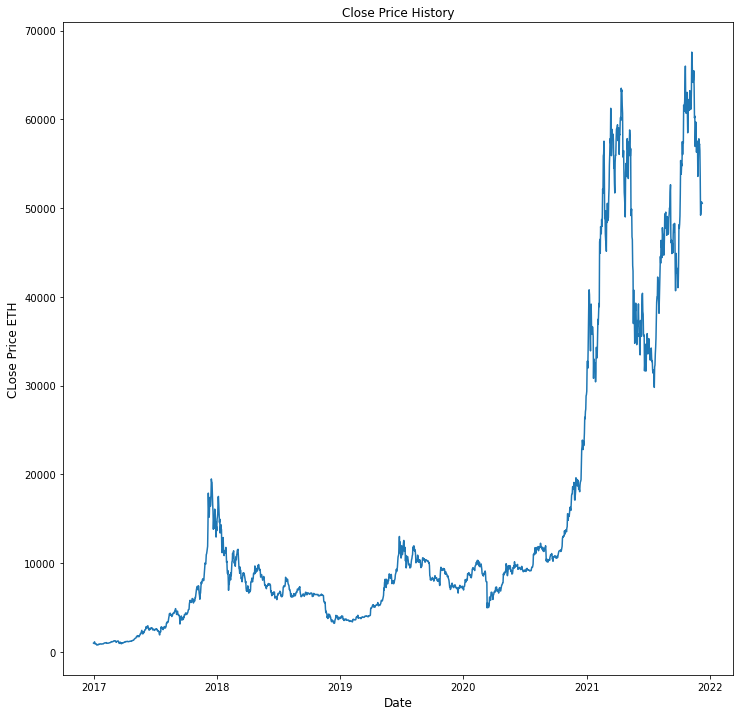

In [15]:
#Visualize the closing price history
plt.figure(figsize=(12,12))
plt.title('Close Price History')
plt.plot(df['btc_close'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('CLose Price ETH', fontsize=12)
plt.show()

### Correlations

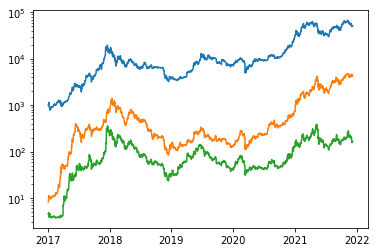

In [16]:
plt.yscale('log')
plt.plot(plot_df)

In [17]:
correlations = df.corr()["eth_close"]
correlations

btc_high         0.922637
btc_low          0.923550
btc_open         0.923119
btc_close        0.922549
btc_volume       0.491978
btc_adj_close    0.922549
eth_high         0.998928
eth_low          0.998950
eth_open         0.997895
eth_close        1.000000
eth_volume       0.625930
eth_adj_close    1.000000
ltc_high         0.747432
ltc_low          0.758203
ltc_open         0.750983
ltc_close        0.752407
ltc_volume       0.291191
ltc_adj_close    0.752407
Name: eth_close, dtype: float64

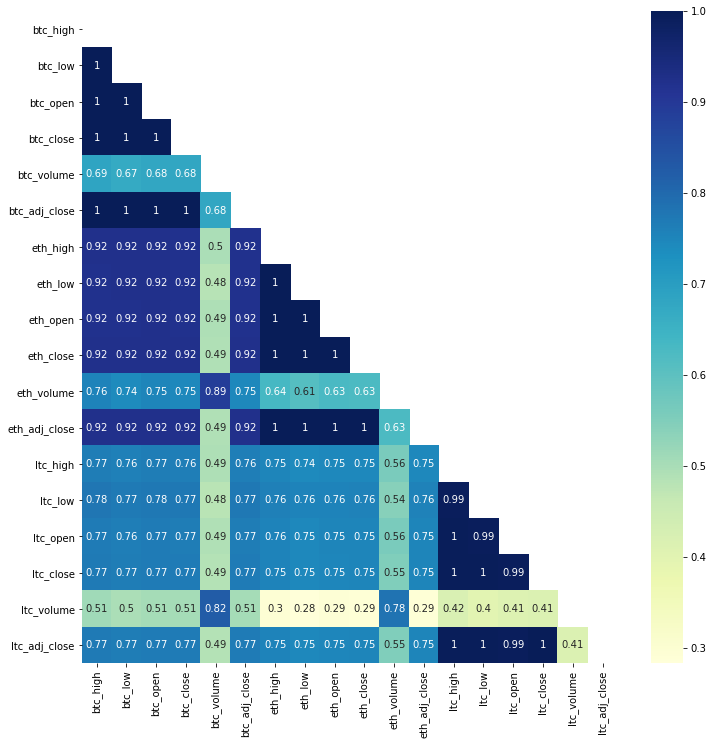

In [18]:
cmap = sns.cm.rocket_r  ## for reversing the colors
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(12, 12))
ax=sns.heatmap(df.corr(), mask=mask, annot=True,cmap="YlGnBu")
plt.show()

In [19]:
newdf = df.filter(["btc_close","eth_close","ltc_close","btc_volume","eth_volume","ltc_volume"], axis=1)
newdf

,btc_close,eth_close,ltc_close,btc_volume,eth_volume,ltc_volume
Date,,,,,,
2017-01-01,998.325012,8.172570,4.511590,1.477750e+08,1.473170e+07,1.133750e+07
2017-01-02,1021.750000,8.378510,4.648940,2.221850e+08,1.457960e+07,1.459530e+07
2017-01-03,1043.839966,9.725250,4.626200,1.851680e+08,3.362520e+07,1.005570e+07
2017-01-04,1154.729980,11.251600,4.837850,3.449460e+08,4.105120e+07,1.376240e+07
2017-01-05,1013.380005,10.254400,4.292720,5.101990e+08,4.155740e+07,1.919600e+07
...,...,...,...,...,...,...
2021-12-04,49200.703125,4119.587402,163.052704,6.138568e+10,3.847900e+10,3.667491e+09
2021-12-05,49368.847656,4198.322754,156.409790,3.719820e+10,2.553306e+10,1.952282e+09
2021-12-06,50582.625000,4358.737305,161.886520,3.770731e+10,2.822952e+10,1.959779e+09


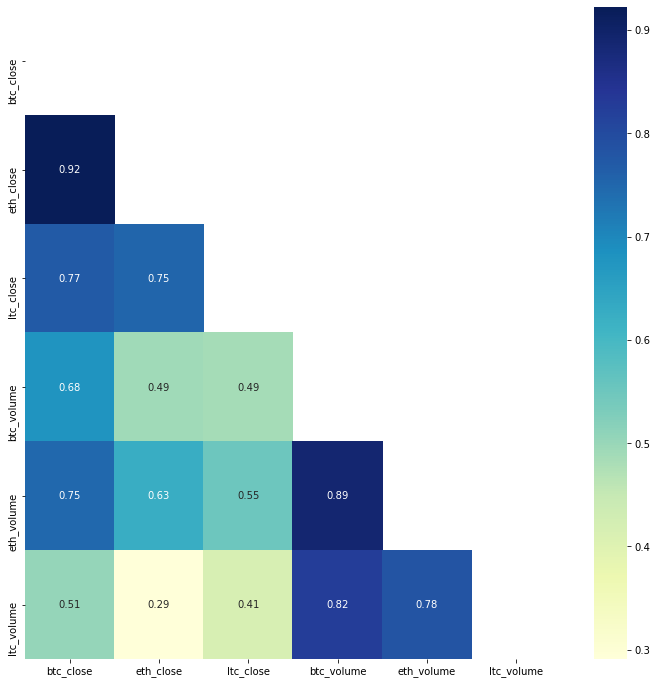

In [20]:
cmap = sns.cm.rocket_r  ## for reversing the colors
mask=np.zeros_like(newdf.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(12, 12))
ax=sns.heatmap(newdf.corr(), mask=mask, annot=True,cmap="YlGnBu")
plt.show()

<AxesSubplot:xlabel='eth_close'>

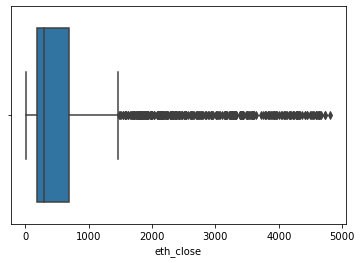

In [21]:
sns.boxplot(df.eth_close)

<AxesSubplot:xlabel='btc_volume'>

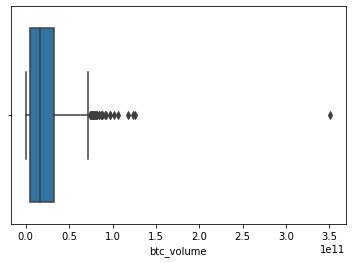

In [22]:
sns.boxplot(df.btc_volume)

<AxesSubplot:xlabel='btc_close'>

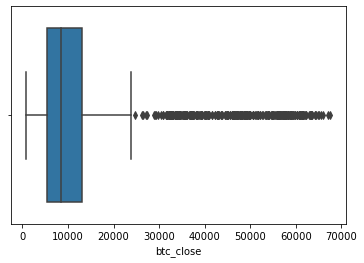

In [23]:
sns.boxplot(df.btc_close)

### Data Split

In [24]:
X=newdf.drop("eth_close", axis=1)
y=newdf.eth_close

In [25]:
X

,btc_close,ltc_close,btc_volume,eth_volume,ltc_volume
Date,,,,,
2017-01-01,998.325012,4.511590,1.477750e+08,1.473170e+07,1.133750e+07
2017-01-02,1021.750000,4.648940,2.221850e+08,1.457960e+07,1.459530e+07
2017-01-03,1043.839966,4.626200,1.851680e+08,3.362520e+07,1.005570e+07
2017-01-04,1154.729980,4.837850,3.449460e+08,4.105120e+07,1.376240e+07
2017-01-05,1013.380005,4.292720,5.101990e+08,4.155740e+07,1.919600e+07
...,...,...,...,...,...
2021-12-04,49200.703125,163.052704,6.138568e+10,3.847900e+10,3.667491e+09
2021-12-05,49368.847656,156.409790,3.719820e+10,2.553306e+10,1.952282e+09
2021-12-06,50582.625000,161.886520,3.770731e+10,2.822952e+10,1.959779e+09


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Scikit-learning 
model = LinearRegression()
model.fit(X_train, y_train)
# Predictions
predictions = model.predict(X_test)

# Main metrics
print('R2:', r2_score(y_test, predictions))
print('MAE:', mae(y_test, predictions))
print('MSE:', mse(y_test, predictions, squared=False))

R2: 0.925484368256645
MAE: 177.8670132238025
MSE: 295.3487850698578


In [28]:
# Using Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)

predicted_price = regressor.predict(X_test)


print('R2:', r2_score(y_test, predicted_price))
print('MAE:', mae(y_test, predicted_price)) 
print('MSE:', mse(y_test,predicted_price, squared=False)) 
print('Root MSE:', np.sqrt(mse(y_test, predicted_price)))

R2: 0.9779924722334457
MAE: 59.663661951806795
MSE: 160.50816290850986
Root MSE: 160.50816290850986


### Scaling

+ Normalize the range of independent variables.

In [29]:
std_scaler=StandardScaler().fit(X_train) 

X_train_scaled=std_scaler.transform(X_train)

In [30]:
X_test_scaled=std_scaler.transform(X_test)

### Models with scaled data

+ Use linear regression and Random Forest Regressor for modelling
+ Training the model using .fit
+ Get the predictions on the X_test using the .predict() function
+ Observe the result of the main metrics: 

    + R-squared: check the correlation level 
    + Mean absolute error (MAE): measures the absolute errors between paired observations
    + Mean standard error (MSE): measures the average squared difference between the estimated values and the actual value.


+ Check the main metrics using OLS (Ordinary Least Squares regression)


In [31]:
# OLS Regression

X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              eth_close   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     2800.
Date:                Thu, 09 Dec 2021   Prob (F-statistic):               0.00
Time:                        01:43:00   Log-Likelihood:                -10346.
No. Observations:                1439   AIC:                         2.070e+04
Df Residuals:                    1433   BIC:                         2.074e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        740.0922      8.475     87.328      0.0

In [42]:
y_pred

array([ 2.34319090e+02,  2.32158534e+02,  3.43551949e+03,  6.36384275e+02,
        1.08510091e+02,  2.91057818e+03,  1.59518210e+02,  3.61821472e+03,
        1.08566848e+01,  2.80669587e+03,  1.21213450e+02,  3.42854628e+02,
        3.71971097e+02,  3.15264753e+03,  3.85807463e+02,  2.98918830e+02,
        7.98097859e+02,  1.49114261e+02,  8.18363572e+02,  1.17678072e+02,
        6.63547895e+02,  1.23005874e+02,  1.49198078e+02,  5.44556192e+02,
        2.16059097e+03,  1.68545242e+02,  3.61310200e+02,  1.40034940e+02,
        3.31541310e+02,  2.88791521e+02,  3.30808838e+02,  8.08310817e+02,
        3.27354854e+02,  1.12308404e+03,  2.79858472e+03,  4.38038096e+02,
        5.92581783e+02,  2.13570430e+03,  3.28452986e+03,  6.47951481e-01,
        3.04376899e+03,  2.29122452e+02,  3.48123018e+02,  1.35815128e+02,
        2.92488605e+03,  6.42612131e+02,  4.14651121e+02,  8.49405758e+02,
        5.93407030e+02,  5.18270861e+02,  6.92264320e+02,  1.67162422e+02,
        3.05704333e+03,  

In [33]:
# Sckit-learning
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

y
y_pred=model.predict(X_test_scaled)   # model prediction


y_pred_train=model.predict(X_train_scaled)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mae(y_test, y_pred))
print('MSE:', mse(y_test,y_pred, squared=False))

R2: 0.9254843683711435
MAE: 177.86701313600565
MSE: 295.3487848429458


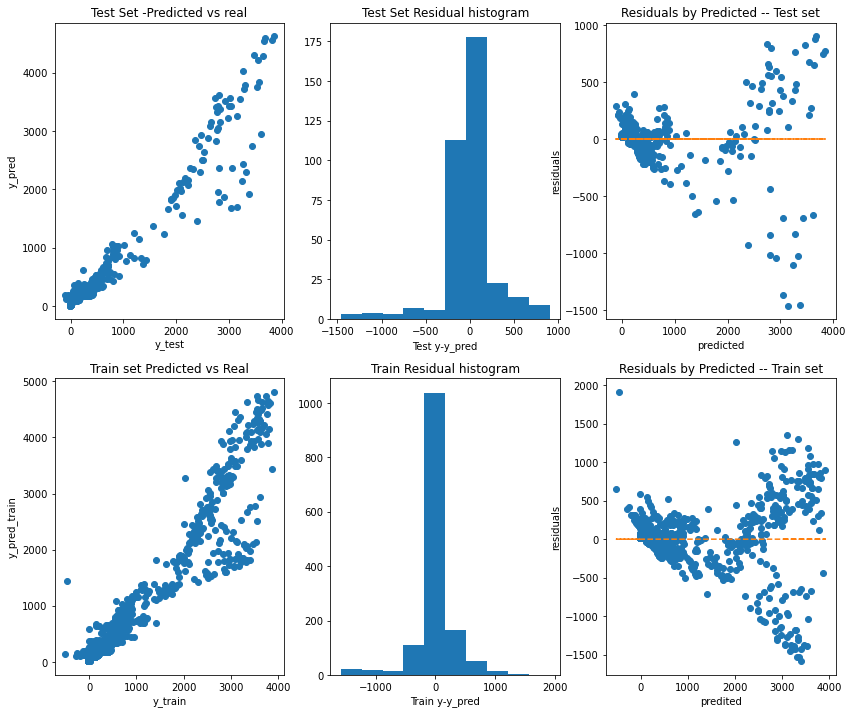

In [34]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(2,3,figsize=(14,12))
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[0,2].plot(y_pred,y_test - y_pred,"o")
ax[0,2].set_xlabel("predicted")
ax[0,2].set_ylabel("residuals")
ax[0,2].set_title("Residuals by Predicted -- Test set")
ax[0,2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')


ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs Real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")

ax[1,2].plot(y_pred_train,y_train - y_pred_train,"o")
ax[1,2].set_xlabel("predited")
ax[1,2].set_ylabel("residuals")
ax[1,2].set_title("Residuals by Predicted -- Train set")
ax[1,2].plot(y_pred_train,np.zeros(len(y_pred_train)),linestyle='dashed')

In [35]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

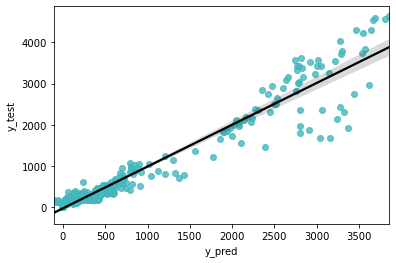

In [36]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "#42B7BD"}, line_kws={"color": "black"})

### Feature Importance

In [37]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by=["Importance"], ascending=False)

In [38]:
round(features_importances.head(50),1)

,Attribute,Importance
0,btc_close,931.7
4,ltc_volume,278.9
3,eth_volume,273.9
2,btc_volume,199.0
1,ltc_close,135.9


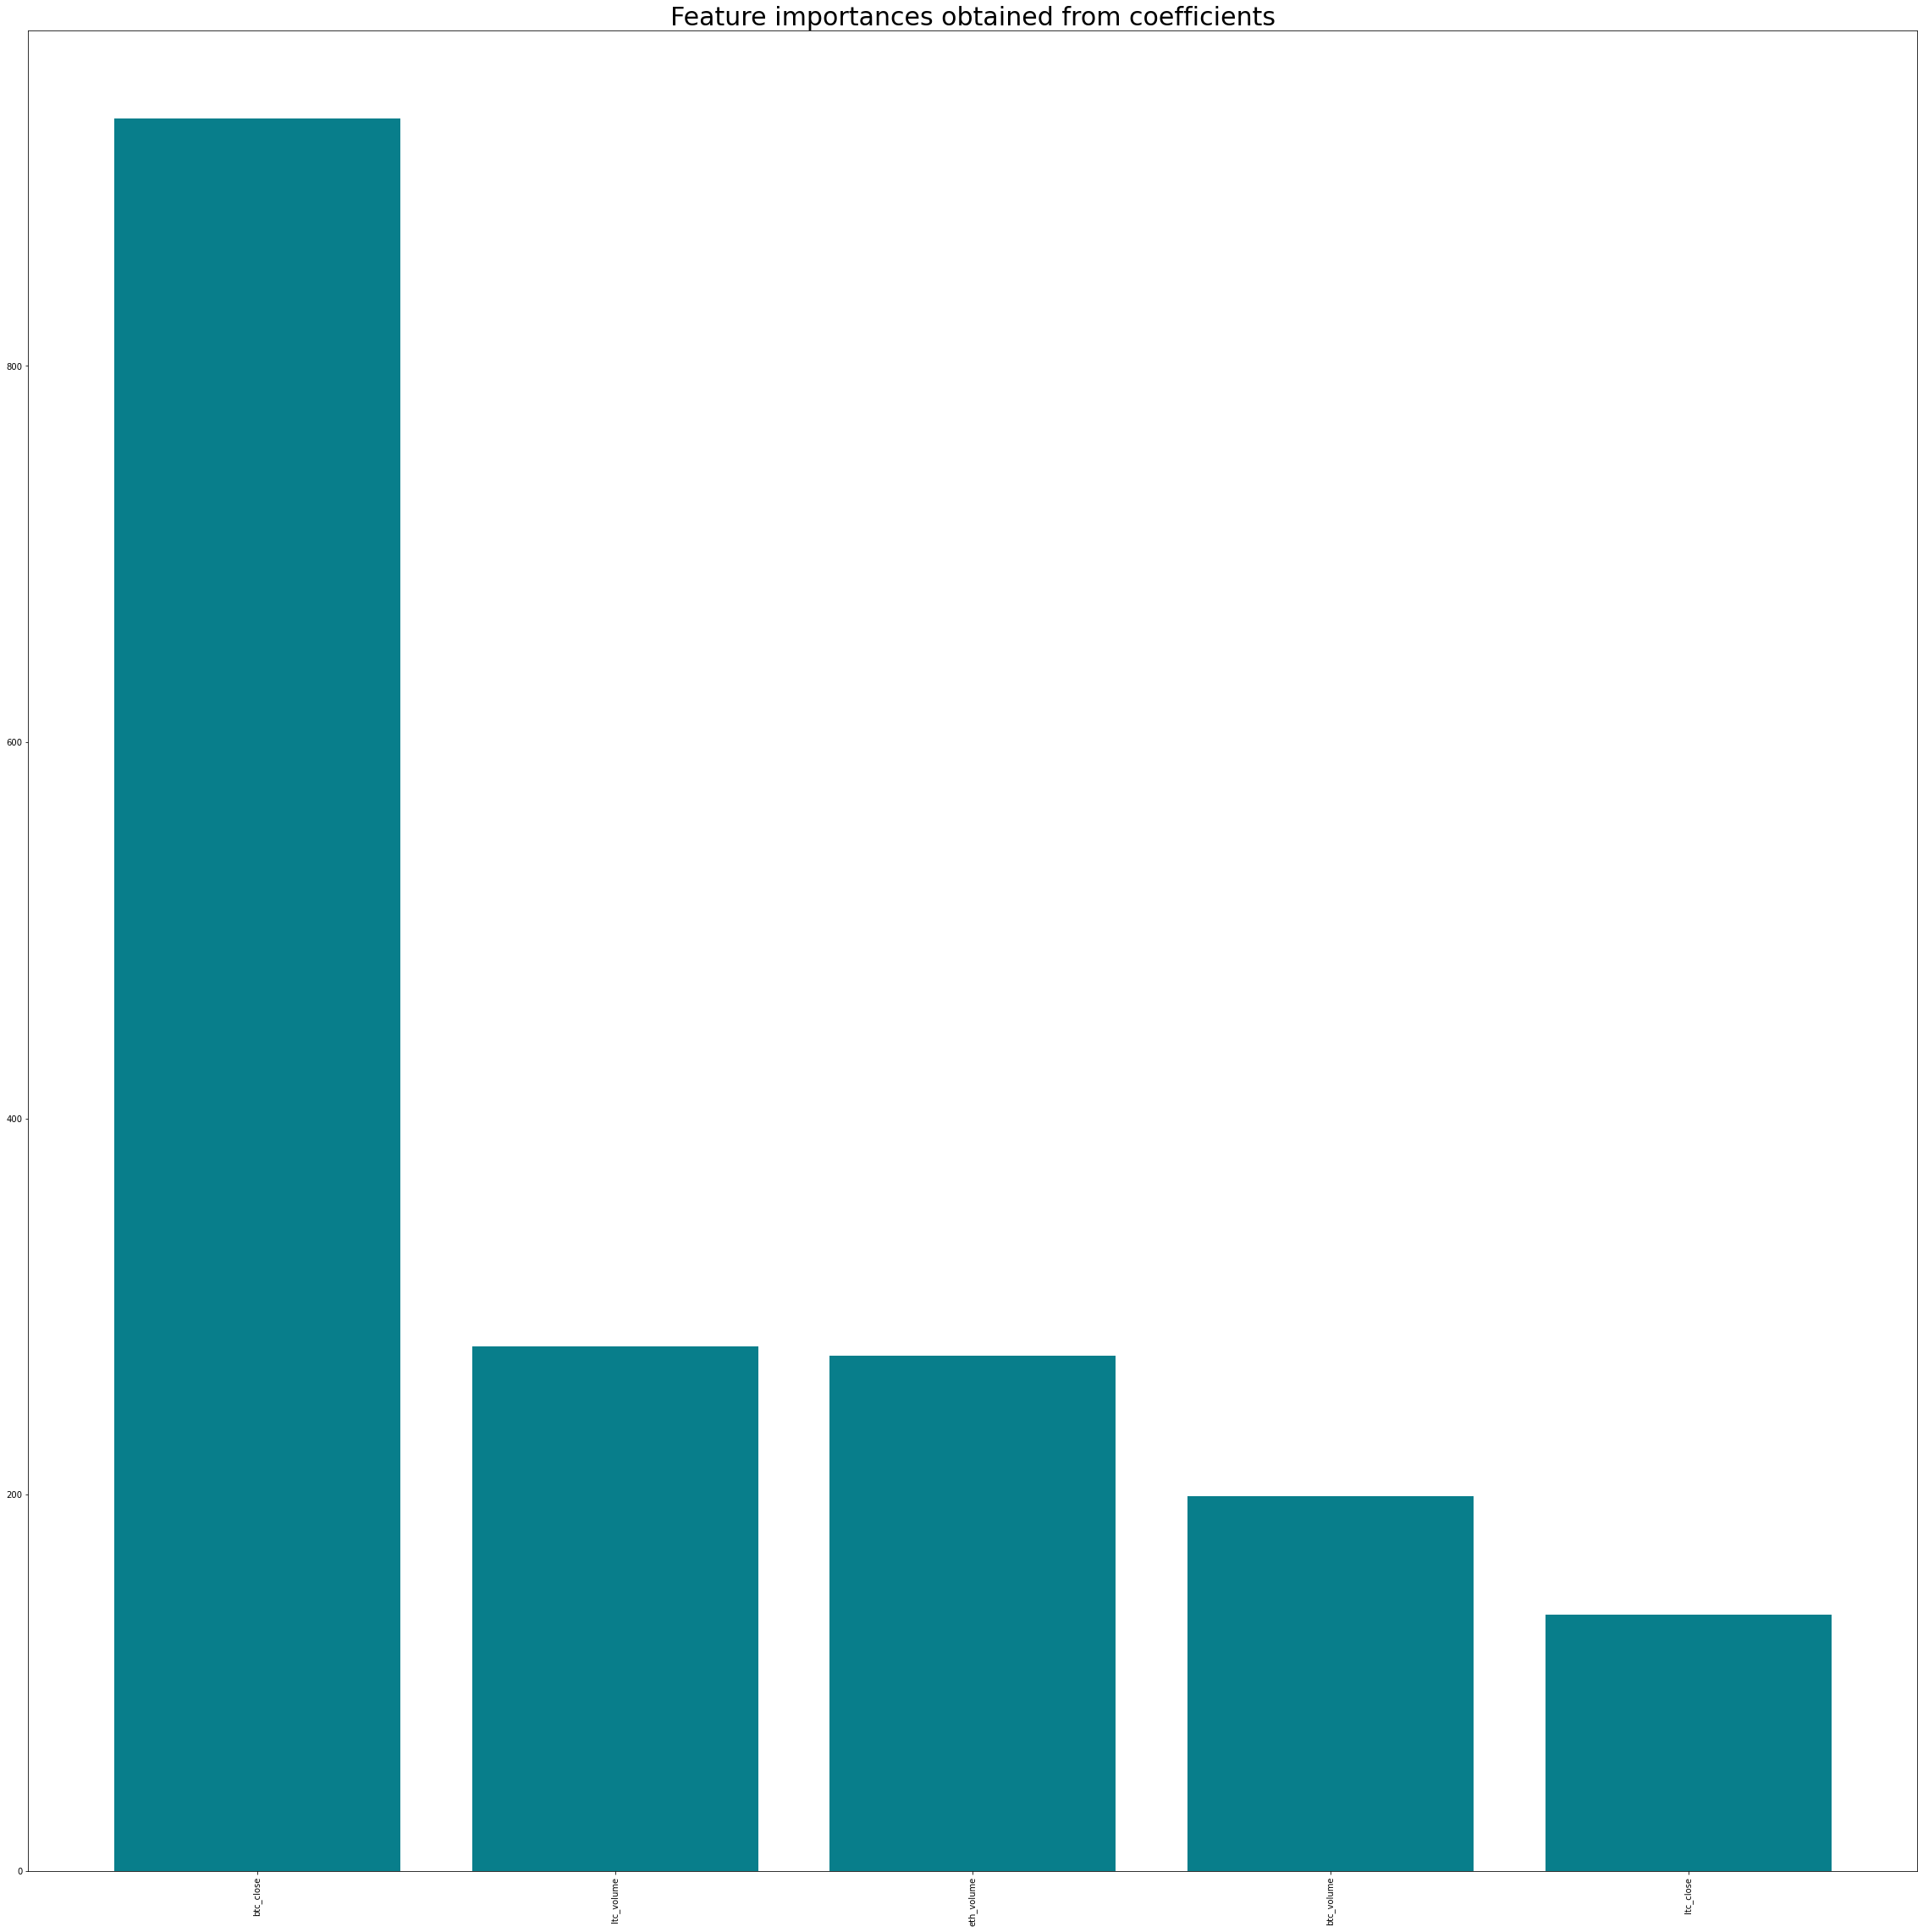

In [39]:
plt.figure(figsize=(40,40))
plt.bar(x=features_importances['Attribute'], height=features_importances["Importance"], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=30)
plt.xticks(rotation='vertical')
plt.show()

In [40]:
# How to make fontsize bigger?

In [41]:
#predition into the future???
projection=14

# Long short-term memory (LSTM)